In [3]:
import requests


In [4]:
from parsel import Selector


In [1]:
import numpy as np
import os 

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.rcParams['axes.labelsize'] = 14 
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
def plot_image(image):
    plt.imshow(image,cmap='gray',interpolation='nearest')
    plt.axis('off')
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation='nearest')
    plt.axis('off')

In [3]:
import tensorflow as tf

# Convolutional Layer

In [4]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
image = china[150:220,130:250]
height,width,channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1,height,width,1)

In [5]:
china.shape,image.shape

((427, 640, 3), (70, 120, 3))

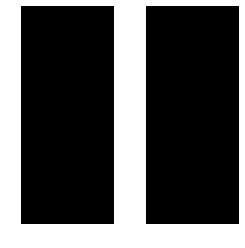

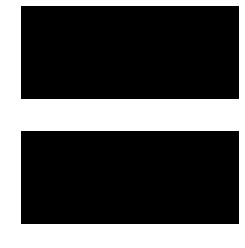

In [20]:

fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
fmap[:, :, 0, 0]
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

In [16]:

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

In [17]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

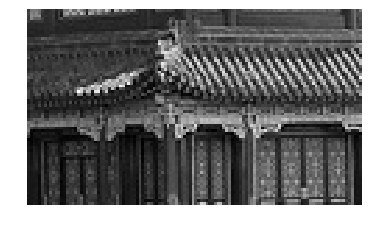

In [24]:
plot_image(images[0, :, :, 0])

plt.show()

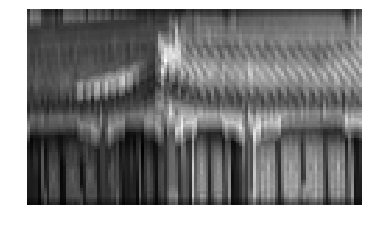

In [25]:
plot_image(output[0, :, :, 0])

plt.show()

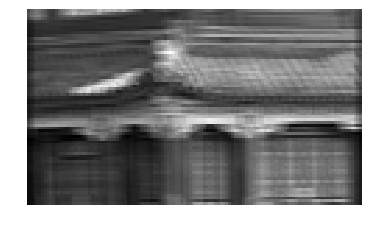

In [27]:
plot_image(output[0, :, :, 1])

plt.show()

# Simple example

In [28]:
dataset = np.array([china,flower],dtype=np.float32)
batch_size,height,width,channels = dataset.shape



In [29]:
batch_size

2

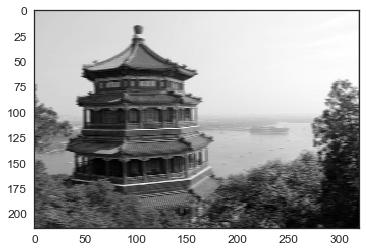

In [31]:
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)
filters[:,3,:,0] =1
filters[3,:,:,1] = 1

X = tf.placeholder(tf.float32,shape=(None,height,width,channels))
convolution = tf.nn.conv2d(X,filters,strides=[1,2,2,1],padding='SAME')

with tf.Session() as sess:
    output = sess.run(convolution,feed_dict={X:dataset})
    
plt.imshow(output[0,:,:,1],cmap='gray')
plt.show()

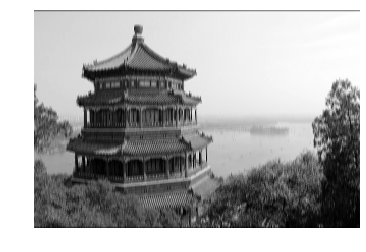

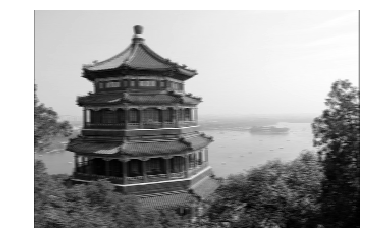

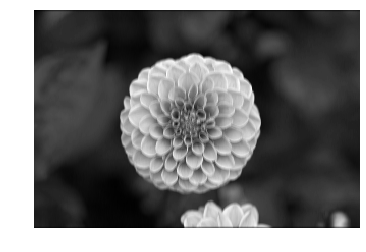

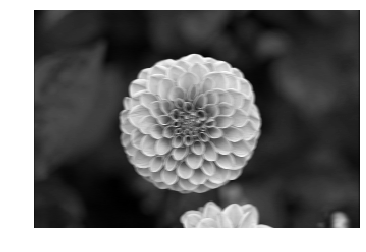

In [32]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

In [33]:
reset_graph()

X = tf.placeholder(shape=(None,height,width,channels),dtype=tf.float32)
conv = tf.layers.conv2d(X,filters=2,kernel_size=7,strides=[2,2],padding='SAME')

In [53]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv,feed_dict={X:dataset})
    
plt.imshow(output[0,:,:,1],cmap='gray')
plt.show()

ValueError: Fetch argument <tf.Tensor 'conv2d/BiasAdd:0' shape=(?, 214, 320, 2) dtype=float32> cannot be interpreted as a Tensor. (Tensor Tensor("conv2d/BiasAdd:0", shape=(?, 214, 320, 2), dtype=float32) is not an element of this graph.)

# VALID vs SAME padding

In [37]:
reset_graph()

filter_primes = np.array([2.,3,5,7,11,13],dtype=np.float32)
x = tf.constant(np.arange(1,13+1,dtype=np.float32).reshape([1,1,13,1]))
filters = tf.constant(filter_primes.reshape(1,6,1,1))

valid_conv = tf.nn.conv2d(x,filters,strides=[1,1,5,1],padding='VALID')
same_conv = tf.nn.conv2d(x,filters,strides=[1,1,5,1],padding='SAME')

with tf.Session() as sess:
    print('VALID:\n',valid_conv.eval())
    print('SAME:\n',same_conv.eval())

VALID:
 [[[[ 184.]
   [ 389.]]]]
SAME:
 [[[[ 143.]
   [ 348.]
   [ 204.]]]]


In [38]:
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))

184.0


In [41]:
np.array([1,2,3,4,5,6]).T.shape

(6,)

In [42]:
np.array([1,2,3,4,5,6]).shape

(6,)

# Pooling layer

In [6]:
batch_size,height,width,channels = dataset.shape

filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

NameError: name 'dataset' is not defined

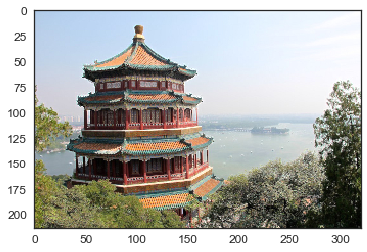

In [57]:
X = tf.placeholder(tf.float32,shape=(None,height,width,channels))
max_pool = tf.nn.max_pool(X,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool,feed_dict={X:dataset})
    
plt.imshow(output[0].astype(np.uint8))
plt.show()

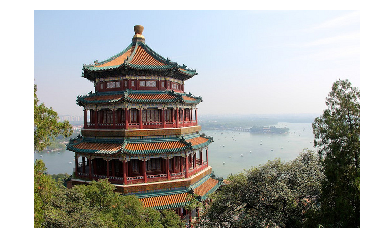

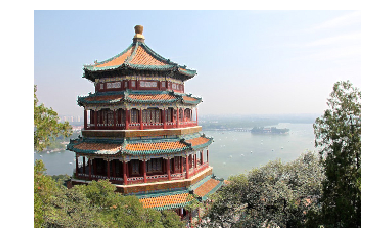

In [60]:

plot_color_image(dataset[0])
#save_fig("china_original")
plt.show()
    
plot_color_image(output[0])
#save_fig("china_max_pool")
plt.show()

# MNIST

In [5]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 2
conv1_pad = "SAME"

conv2_fmaps = 32
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv1_fmaps

n_fc1 = 32
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
#conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
#                         strides=conv2_stride, padding=conv2_pad,
#                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('E:/python_work/handson_ml/datasets')

Extracting E:/python_work/handson_ml/datasets\train-images-idx3-ubyte.gz
Extracting E:/python_work/handson_ml/datasets\train-labels-idx1-ubyte.gz
Extracting E:/python_work/handson_ml/datasets\t10k-images-idx3-ubyte.gz
Extracting E:/python_work/handson_ml/datasets\t10k-labels-idx1-ubyte.gz


In [7]:
n_epochs = 50
batch_size = 20

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170924/my_mnist_model")

0 Train accuracy: 1.0 Test accuracy: 0.9605
1 Train accuracy: 1.0 Test accuracy: 0.977
2 Train accuracy: 1.0 Test accuracy: 0.9798
3 Train accuracy: 0.95 Test accuracy: 0.9777
4 Train accuracy: 1.0 Test accuracy: 0.983
5 Train accuracy: 1.0 Test accuracy: 0.9836
6 Train accuracy: 1.0 Test accuracy: 0.9852
7 Train accuracy: 1.0 Test accuracy: 0.9824
8 Train accuracy: 1.0 Test accuracy: 0.983
9 Train accuracy: 1.0 Test accuracy: 0.9849
10 Train accuracy: 1.0 Test accuracy: 0.9849
11 Train accuracy: 1.0 Test accuracy: 0.984
12 Train accuracy: 1.0 Test accuracy: 0.9866
13 Train accuracy: 1.0 Test accuracy: 0.9848
14 Train accuracy: 1.0 Test accuracy: 0.9853
15 Train accuracy: 1.0 Test accuracy: 0.9859
16 Train accuracy: 1.0 Test accuracy: 0.9847
17 Train accuracy: 1.0 Test accuracy: 0.9857
18 Train accuracy: 1.0 Test accuracy: 0.9838
19 Train accuracy: 1.0 Test accuracy: 0.9847
20 Train accuracy: 1.0 Test accuracy: 0.9811
21 Train accuracy: 1.0 Test accuracy: 0.9838
22 Train accuracy: 1.0 

# Exercise

## 7 High Accuracy CNN for MNIST

In [8]:
import tensorflow as tf
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 16
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 32
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"
conv2_dropout_rate = 0.25

pool3_fmaps = conv2_fmaps

n_fc1 = 128
fc1_dropout_rate = 0.5

n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])
    pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [9]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

In [10]:
n_epochs = 1000
batch_size = 20

best_loss_val = np.infty
check_interval = 500
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict={X: mnist.validation.images,
                                                y: mnist.validation.labels})
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                           y: mnist.validation.labels})
        print("Epoch {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                  epoch, acc_train * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                        y: mnist.test.labels})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170925/my_mnist_model")

Epoch 0, train accuracy: 100.0000%, valid. accuracy: 98.4200%, valid. best loss: 0.063347
Epoch 1, train accuracy: 100.0000%, valid. accuracy: 98.8000%, valid. best loss: 0.040837
Epoch 2, train accuracy: 100.0000%, valid. accuracy: 98.9600%, valid. best loss: 0.036178
Epoch 3, train accuracy: 95.0000%, valid. accuracy: 98.6800%, valid. best loss: 0.034196
Epoch 4, train accuracy: 100.0000%, valid. accuracy: 99.1600%, valid. best loss: 0.034196
Epoch 5, train accuracy: 100.0000%, valid. accuracy: 98.9800%, valid. best loss: 0.030559
Epoch 6, train accuracy: 100.0000%, valid. accuracy: 99.1200%, valid. best loss: 0.030559
Epoch 7, train accuracy: 100.0000%, valid. accuracy: 99.1200%, valid. best loss: 0.029464
Epoch 8, train accuracy: 100.0000%, valid. accuracy: 98.6000%, valid. best loss: 0.029464
Epoch 9, train accuracy: 100.0000%, valid. accuracy: 99.0200%, valid. best loss: 0.029464
Epoch 10, train accuracy: 100.0000%, valid. accuracy: 99.0800%, valid. best loss: 0.029464
Early stop

## 8 Classifying large images using Inception v3

In [18]:
width = 299
height = 299
channels = 3

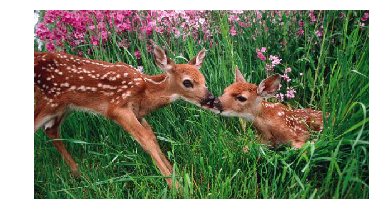

In [10]:
import matplotlib.image as mpimg
test_image = mpimg.imread('E:/python_work/handson_ml/datasets/dongwu1.jpg')[:,:,:channels]
plt.imshow(test_image)
plt.axis('off')
plt.show()

In [17]:
test_image[:5]

array([[[ 62,  99,  92],
        [ 65,  97,  94],
        [106, 132, 133],
        ..., 
        [ 55,  57,  44],
        [ 49,  50,  36],
        [ 50,  53,  36]],

       [[ 61,  96,  90],
        [ 62,  92,  90],
        [ 94, 118, 120],
        ..., 
        [ 40,  37,  28],
        [ 40,  38,  26],
        [ 56,  54,  41]],

       [[ 58,  89,  84],
        [ 70,  96,  95],
        [109, 128, 132],
        ..., 
        [ 48,  37,  35],
        [ 34,  23,  19],
        [ 35,  28,  20]],

       [[ 75, 100,  97],
        [ 99, 119, 120],
        [136, 151, 156],
        ..., 
        [ 57,  32,  38],
        [ 42,  20,  23],
        [ 26,  10,  11]],

       [[128, 146, 146],
        [150, 164, 167],
        [163, 172, 179],
        ..., 
        [ 65,  24,  40],
        [ 75,  39,  53],
        [ 64,  37,  46]]], dtype=uint8)

In [17]:
a = test_image[:,:,:channels].copy()


In [18]:
a.shape

(338, 600, 3)

In [19]:
b = a/a.max()

In [20]:
b[:5]

array([[[ 0.24313725,  0.38823529,  0.36078431],
        [ 0.25490196,  0.38039216,  0.36862745],
        [ 0.41568627,  0.51764706,  0.52156863],
        ..., 
        [ 0.21568627,  0.22352941,  0.17254902],
        [ 0.19215686,  0.19607843,  0.14117647],
        [ 0.19607843,  0.20784314,  0.14117647]],

       [[ 0.23921569,  0.37647059,  0.35294118],
        [ 0.24313725,  0.36078431,  0.35294118],
        [ 0.36862745,  0.4627451 ,  0.47058824],
        ..., 
        [ 0.15686275,  0.14509804,  0.10980392],
        [ 0.15686275,  0.14901961,  0.10196078],
        [ 0.21960784,  0.21176471,  0.16078431]],

       [[ 0.22745098,  0.34901961,  0.32941176],
        [ 0.2745098 ,  0.37647059,  0.37254902],
        [ 0.42745098,  0.50196078,  0.51764706],
        ..., 
        [ 0.18823529,  0.14509804,  0.1372549 ],
        [ 0.13333333,  0.09019608,  0.0745098 ],
        [ 0.1372549 ,  0.10980392,  0.07843137]],

       [[ 0.29411765,  0.39215686,  0.38039216],
        [ 0.38823529,

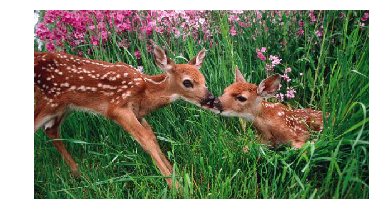

In [13]:
plt.imshow(b)
plt.axis('off')
plt.show()

In [23]:
from PIL import Image
im = np.array(Image.open('E:/python_work/handson_ml/datasets/dongwu1.jpg'))


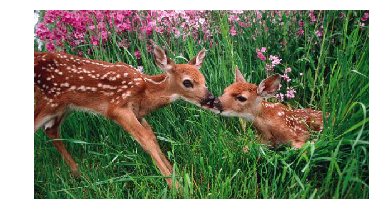

In [24]:
plt.imshow(im)
plt.axis('off')
plt.show()

In [25]:
im[:5]

array([[[ 62,  99,  92],
        [ 65,  97,  94],
        [106, 132, 133],
        ..., 
        [ 55,  57,  44],
        [ 49,  50,  36],
        [ 50,  53,  36]],

       [[ 61,  96,  90],
        [ 62,  92,  90],
        [ 94, 118, 120],
        ..., 
        [ 40,  37,  28],
        [ 40,  38,  26],
        [ 56,  54,  41]],

       [[ 58,  89,  84],
        [ 70,  96,  95],
        [109, 128, 132],
        ..., 
        [ 48,  37,  35],
        [ 34,  23,  19],
        [ 35,  28,  20]],

       [[ 75, 100,  97],
        [ 99, 119, 120],
        [136, 151, 156],
        ..., 
        [ 57,  32,  38],
        [ 42,  20,  23],
        [ 26,  10,  11]],

       [[128, 146, 146],
        [150, 164, 167],
        [163, 172, 179],
        ..., 
        [ 65,  24,  40],
        [ 75,  39,  53],
        [ 64,  37,  46]]], dtype=uint8)

In [26]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
reg.coef_


array([ 0.34545455,  0.34545455])

In [28]:
reg.intercept_

0.13636363636363641

Automatically created module for IPython interactive environment


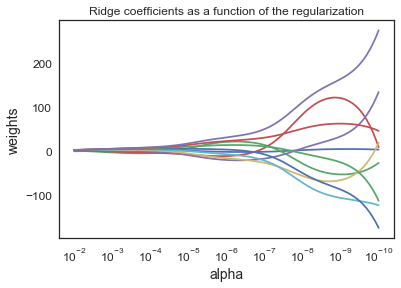

In [29]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [32]:
len(coefs)


200

In [33]:
coefs[1]

array([   2.77495275,  -30.12098001,   17.90677619,  125.425644  ,
         10.71783097, -122.86628876, -168.64644663, -106.59632653,
         46.70073767,  265.22300306])

In [34]:
coefs[0]

array([   2.64506141,  -27.60369901,    7.99285023,  133.67550368,
         18.04327446, -123.85504501, -175.62011732, -113.78635247,
         45.1537926 ,  274.02306866])

In [36]:
np.array(coefs).shape

(200, 10)

## 8.2 

In [4]:
import sys
import tarfile
from six.moves import urllib

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("E:/python_work/handson_ml/datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [6]:
fetch_pretrained_inception_v3()

Downloading: 100%

## 8.3

In [7]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

reset_graph()

X = tf.placeholder(tf.float32,shape=[None,299,299,3])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits,end_points = inception.inception_v3(X,num_classes=1001,is_training=False)
predictions = end_points['Predictions']
saver = tf.train.Saver()

In [8]:
with tf.Session() as sess:
    saver.restore(sess,INCEPTION_V3_CHECKPOINT_PATH)

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/datasets\inception\inception_v3.ckpt


In [21]:
X_test = b.reshape(-1,height,width,channels)

with tf.Session() as sess:
    saver.restore(sess,INCEPTION_V3_CHECKPOINT_PATH)
    prediction_val = predictions.eval(feed_dict={X:X_test})

ValueError: cannot reshape array of size 608400 into shape (299,299,3)

## Transfer learning for large image classification

In [4]:

import sys
import tarfile
import urllib

FLOWERS_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"
FLOWERS_PATH = os.path.join("E:/python_work/handson_ml/datasets", "flowers")

def fetch_flowers(url=FLOWERS_URL, path=FLOWERS_PATH):
    if os.path.exists(FLOWERS_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "flower_photos.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    flowers_tgz = tarfile.open(tgz_path)
    flowers_tgz.extractall(path=path)
    flowers_tgz.close()
    os.remove(tgz_path)

In [5]:
fetch_flowers()

In [6]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open(os.path.join("E:/python_work/handson_ml/datasets", "inception", "imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)

In [7]:
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])
flower_classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [8]:
from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path,flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith('.jpg'):
            image_paths[flower_class].append(os.path.join(image_dir,filepath))

In [9]:
for paths in image_paths.values():

    paths.sort()


Class: daisy


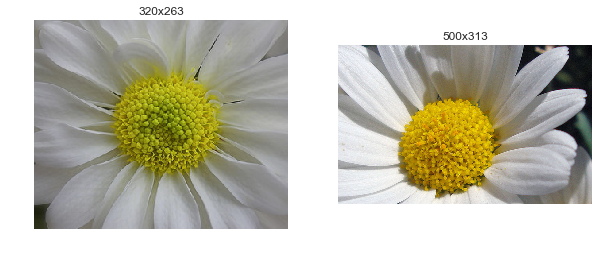

Class: dandelion


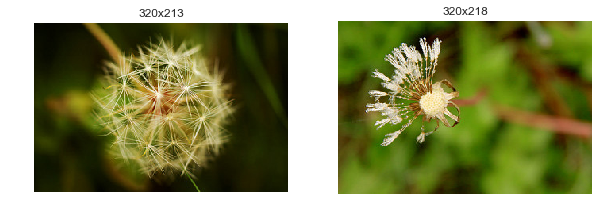

Class: roses


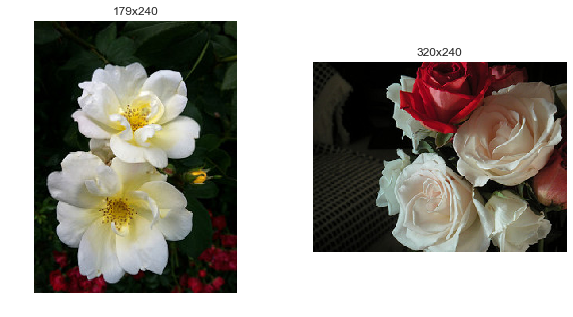

Class: sunflowers


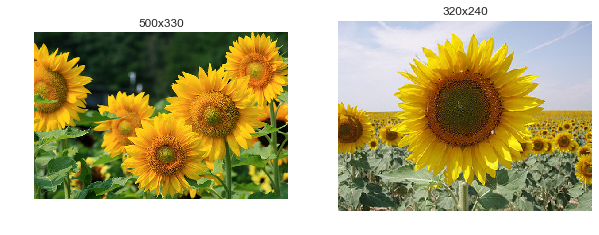

Class: tulips


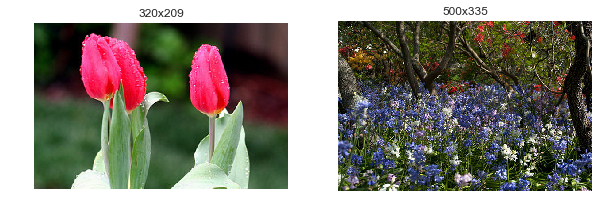

In [11]:
from PIL import Image
import matplotlib.image as mpimg
channels =3
n_examples_per_class = 2

for flower_class in flower_classes:
    print('Class:',flower_class)
    plt.figure(figsize=(10,5))
    for index,example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:,:,:channels]
        plt.subplot(100+n_examples_per_class*10 +index+1)
        plt.title('{}x{}'.format(example_image.shape[1],example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis('off')
    plt.show()

Class: daisy


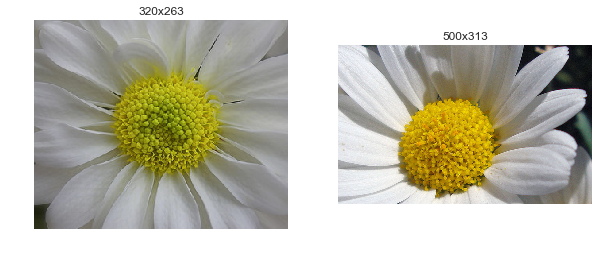

Class: dandelion


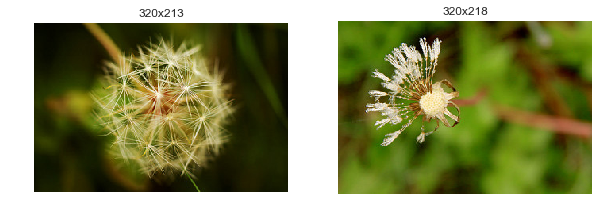

Class: roses


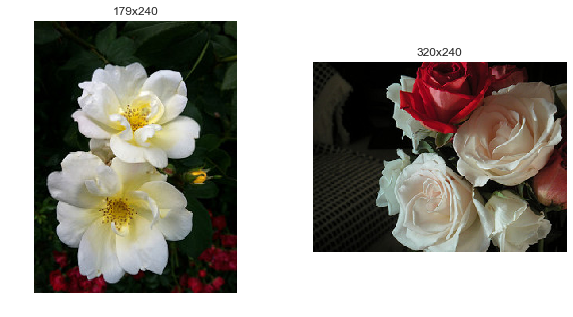

Class: sunflowers


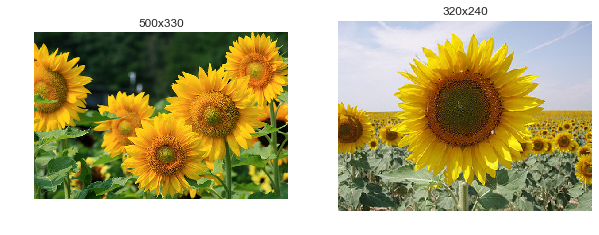

Class: tulips


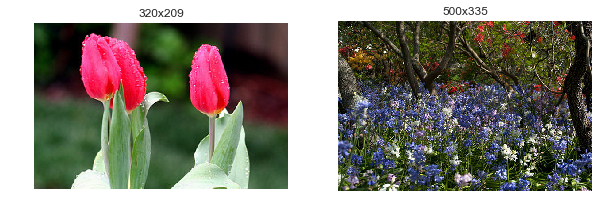

In [42]:
import matplotlib.image as mpimg

n_examples_per_class = 2

for flower_class in flower_classes:
    print("Class:", flower_class)
    plt.figure(figsize=(10,5))
    for index, example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:, :, :channels]
        plt.subplot(100 + n_examples_per_class * 10 + index + 1)
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()

# 9.2

In [12]:
from scipy.misc import imresize

def prepare_image(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    """Zooms and crops the image randomly for data augmentation."""

    # First, let's find the largest bounding box with the target size ratio that fits within the image
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
        
    # Now let's shrink this bounding box by a random factor (dividing the dimensions by a random number
    # between 1.0 and 1.0 + `max_zoom`.
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    # Next, we can select a random location on the image for this bounding box.
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    # Let's crop the image using the random bounding box we built.
    image = image[y0:y1, x0:x1]

    # Let's also flip the image horizontally with 50% probability:
    if np.random.rand() < 0.5:
        image = np.fliplr(image)

    # Now, let's resize the image to the target dimensions.
    image = imresize(image, (target_width, target_height))
    
    # Finally, let's ensure that the colors are represented as
    # 32-bit floats ranging from 0.0 to 1.0 (for now):
    return image.astype(np.float32) / 255

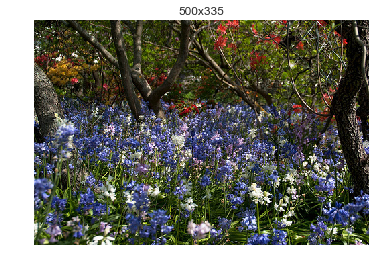

In [13]:
plt.figure(figsize=(6, 8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.show()

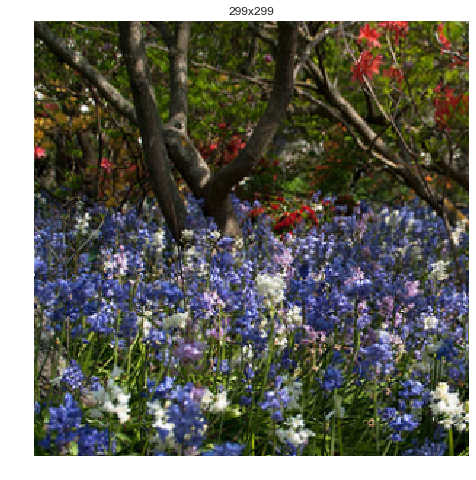

In [14]:
prepared_image = prepare_image(example_image)

plt.figure(figsize=(8, 8))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

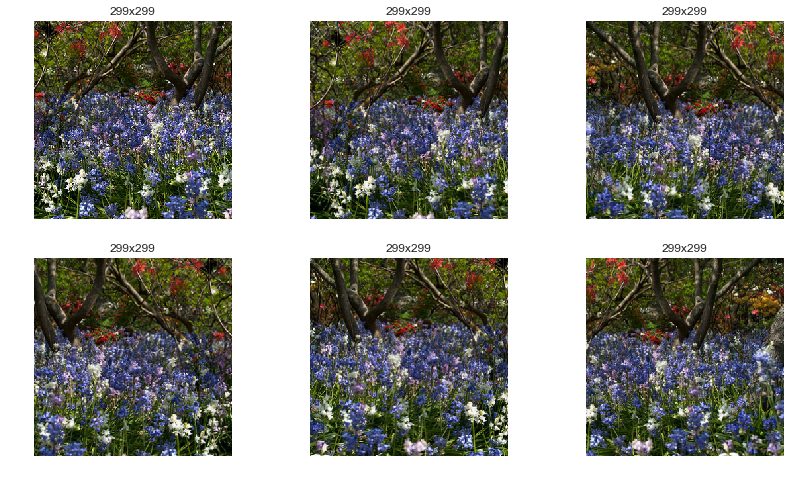

In [45]:

rows, cols = 2, 3

plt.figure(figsize=(14, 8))
for row in range(rows):
    for col in range(cols):
        prepared_image = prepare_image(example_image)
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
        plt.imshow(prepared_image)
        plt.axis("off")
plt.show()

In [15]:
def prepare_image_with_tensorflow(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    """Zooms and crops the image randomly for data augmentation."""

    # First, let's find the largest bounding box with the target size ratio that fits within the image
    image_shape = tf.cast(tf.shape(image), tf.float32)
    height = image_shape[0]
    width = image_shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = tf.cond(crop_vertically,
                         lambda: width,
                         lambda: height * target_image_ratio)
    crop_height = tf.cond(crop_vertically,
                          lambda: width / target_image_ratio,
                          lambda: height)

    # Now let's shrink this bounding box by a random factor (dividing the dimensions by a random number
    # between 1.0 and 1.0 + `max_zoom`.
    resize_factor = tf.random_uniform(shape=[], minval=1.0, maxval=1.0 + max_zoom)
    crop_width = tf.cast(crop_width / resize_factor, tf.int32)
    crop_height = tf.cast(crop_height / resize_factor, tf.int32)
    box_size = tf.stack([crop_height, crop_width, 3])   # 3 = number of channels

    # Let's crop the image using a random bounding box of the size we computed
    image = tf.random_crop(image, box_size)

    # Let's also flip the image horizontally with 50% probability:
    image = tf.image.random_flip_left_right(image)

    # The resize_bilinear function requires a 4D tensor (a batch of images)
    # so we need to expand the number of dimensions first:
    image_batch = tf.expand_dims(image, 0)

    # Finally, let's resize the image to the target dimensions. Note that this function
    # returns a float32 tensor.
    image_batch = tf.image.resize_bilinear(image_batch, [target_height, target_width])
    image = image_batch[0] / 255  # back to a single image, and scale the colors from 0.0 to 1.0
    return image

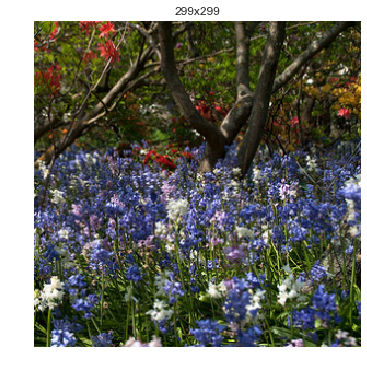

In [16]:

reset_graph()

input_image = tf.placeholder(tf.uint8, shape=[None, None, 3])
prepared_image_op = prepare_image_with_tensorflow(input_image)

with tf.Session():
    prepared_image = prepared_image_op.eval(feed_dict={input_image: example_image})
    
plt.figure(figsize=(6, 6))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

In [40]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

reset_graph()

X = tf.placeholder(tf.float32,shape=[None,height,width,channels],name='X')
training = tf.placeholder_with_default(False,shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits ,end_points = inception.inception_v3(X,num_classes=1001,is_training=training)

inception_saver = tf.train.Saver()

In [41]:
logits.op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/BiasAdd:0' shape=(?, 1, 1, 1001) dtype=float32>

In [42]:
logits.op.inputs[0].op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/convolution:0' shape=(?, 1, 1, 1001) dtype=float32>

In [43]:
logits.op.inputs[0].op.inputs[0].op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/cond/Merge:0' shape=(?, 1, 1, 2048) dtype=float32>

In [44]:
end_points

{'AuxLogits': <tf.Tensor 'InceptionV3/AuxLogits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'Logits': <tf.Tensor 'InceptionV3/Logits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=floa

In [45]:
end_points['PreLogits']

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/cond/Merge:0' shape=(?, 1, 1, 2048) dtype=float32>

In [46]:
prelogits = tf.squeeze(end_points["PreLogits"], axis=[1, 2])

In [47]:
n_outputs = len(flower_classes)

with tf.name_scope("new_output_layer"):
    flower_logits = tf.layers.dense(prelogits, n_outputs, name="flower_logits")
    Y_proba = tf.nn.softmax(flower_logits, name="Y_proba")

In [48]:
y = tf.placeholder(tf.int32, shape=[None])

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=flower_logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    flower_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="flower_logits")
    training_op = optimizer.minimize(loss, var_list=flower_vars)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(flower_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
 

In [49]:
[v.name for v in flower_vars]

['flower_logits/kernel:0', 'flower_logits/bias:0']

In [50]:
flower_class_ids = {flower_class: index for index, flower_class in enumerate(flower_classes)}
flower_class_ids

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [51]:

flower_paths_and_classes = []
for flower_class, paths in image_paths.items():
    for path in paths:
        flower_paths_and_classes.append((path, flower_class_ids[flower_class]))

In [52]:
test_ratio = 0.2
train_size = int(len(flower_paths_and_classes) * (1 - test_ratio))

np.random.shuffle(flower_paths_and_classes)

flower_paths_and_classes_train = flower_paths_and_classes[:train_size]
flower_paths_and_classes_test = flower_paths_and_classes[train_size:]

In [53]:
flower_paths_and_classes_train[:3]

[('E:/python_work/handson_ml/datasets\\flowers\\flower_photos\\daisy\\19834392829_7d697871f6.jpg',
  0),
 ('E:/python_work/handson_ml/datasets\\flowers\\flower_photos\\sunflowers\\5957007921_62333981d2_n.jpg',
  3),
 ('E:/python_work/handson_ml/datasets\\flowers\\flower_photos\\tulips\\7166635566_ee240b5408_n.jpg',
  4)]

In [33]:
from random import sample

def prepare_batch(flower_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    prepared_images = [prepare_image(image) for image in images]
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception expects colors ranging from -1 to 1
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    return X_batch, y_batch

In [34]:
X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size=4)

In [35]:
X_batch.shape

(4, 299, 299, 3)

In [36]:
y_batch.shape

(4,)

In [ ]:
X_test, y_test = prepare_batch(flower_paths_and_classes_test, batch_size=len(flower_paths_and_classes_test))

In [ ]:
X_test.shape

In [ ]:

n_epochs = 10
batch_size = 10
n_iterations_per_epoch = len(flower_paths_and_classes_train) // batch_size

with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, 'E:/python_work/handson_ml/datasets/inception/inception_v3.ckpt')

    for epoch in range(n_epochs):
        print("Epoch", epoch, end="")
        for iteration in range(n_iterations_per_epoch):
            print(".", end="")
            X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})

        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("  Train accuracy:", acc_train)

        save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170926/my_flowers_model")

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/datasets/inception/inception_v3.ckpt
Epoch 0..........................................................................................................................................................................................................................